In [1]:
# BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# PUXO TODOS OS DATAFRAMES

df_perfilv = pd.read_csv('datasets/df_perfilv.csv', index_col = 'Unnamed: 0')
df_perfilt = pd.read_csv('datasets/df_perfilt.csv', index_col = 'Unnamed: 0')
df_perfilm = pd.read_csv('datasets/df_perfilm.csv', index_col = 'Unnamed: 0')

df_perguntasv = pd.read_csv('datasets/df_perguntasv.csv', index_col = 'Unnamed: 0')
df_perguntast = pd.read_csv('datasets/df_perguntast.csv', index_col = 'Unnamed: 0')
df_perguntasm = pd.read_csv('datasets/df_perguntasm.csv', index_col = 'Unnamed: 0')

df_temposv = pd.read_csv('datasets/df_temposv.csv', index_col = 'Unnamed: 0')
df_tempost = pd.read_csv('datasets/df_tempost.csv', index_col = 'Unnamed: 0')
df_temposm = pd.read_csv('datasets/df_temposm.csv', index_col = 'Unnamed: 0')

In [3]:
# CONCATENO CADA DATRAFRAME SEPARADO PELO TIPO DE QUESTIONARIO

df_v = pd.concat([df_perfilv, df_perguntasv['pont'], df_temposv['tmedio']], axis = 1)
df_t = pd.concat([df_perfilt, df_perguntast['pont'], df_tempost['tmedio']], axis = 1)
df_m = pd.concat([df_perfilm, df_perguntasm['pont'], df_temposm['tmedio']], axis = 1)

In [4]:
#UNO OS TRÊS DATAFRAMES EM UM UNICO PARA FAZER ANÁLISE EXPLORATORIA DOS DADOS

df = df_v.append([df_t, df_m])

df.to_csv('datasets/geral.csv')

# Análise 1 - Perfil dos Alunos

### Alunos por idade

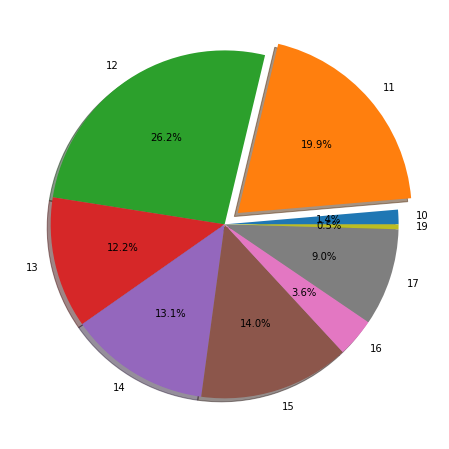

In [5]:
fig = plt.figure(figsize=(8,8))

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.pie(df.groupby(['idade']).count()['nome'], 
        labels = df.groupby(['idade']).count()['nome'].index,
       autopct='%1.1f%%',
       explode = explode,
       shadow = True)


#plt.title('Pizza - Faixa Etaria dos Alunos Participantes', fontsize=20)
plt.savefig(f'graficos/pieplot_faixaetaria.png', bbox_inches='tight')

plt.show()

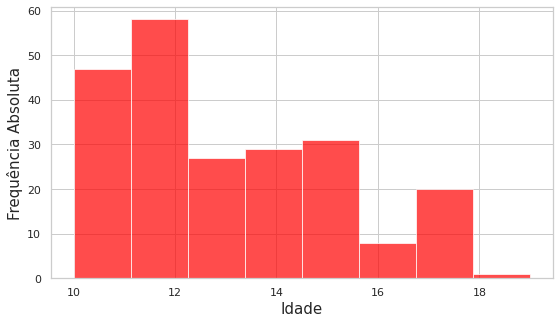

In [10]:
plt.figure(figsize=(9,5))

plt.hist(df['idade'], bins = 8, color = 'red', alpha = 0.7, edgecolor = 'white' )

plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Frequência Absoluta', fontsize = 15)

#plt.title('Histograma - Faixa Etaria dos Alunos Participantes', fontsize = 20)
plt.savefig(f'graficos/hist_faixaetaria.png', bbox_inches='tight')

plt.show()

## Alunos por sexo

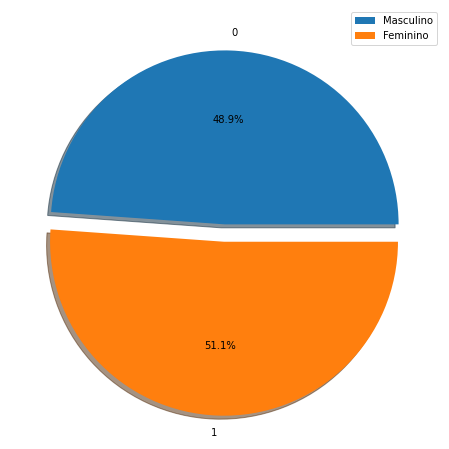

In [7]:
plt.figure(figsize=(8,8))


explode = (0, 0.1)
pie1 = plt.pie(df.groupby(['sfem']).count()['nome'], 
        labels = df.groupby(['sfem']).count()['nome'].index,
       autopct='%1.1f%%',
       explode = explode,
       shadow = True)
#plt.title('Genero dos Participantes', fontsize=20)
L=plt.legend()
L.get_texts()[0].set_text('Masculino')
L.get_texts()[1].set_text('Feminino')

plt.savefig(f'graficos/pieplot_genero.png', bbox_inches='tight')
plt.show()







## Informações Gerais

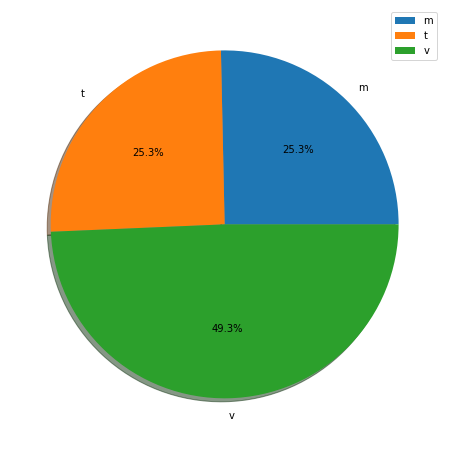

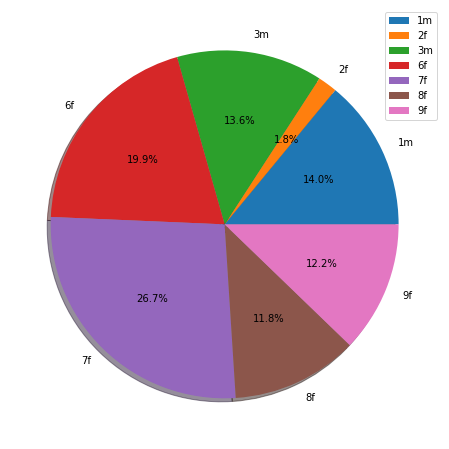

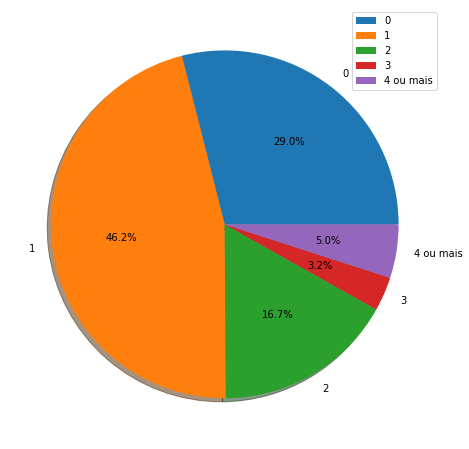

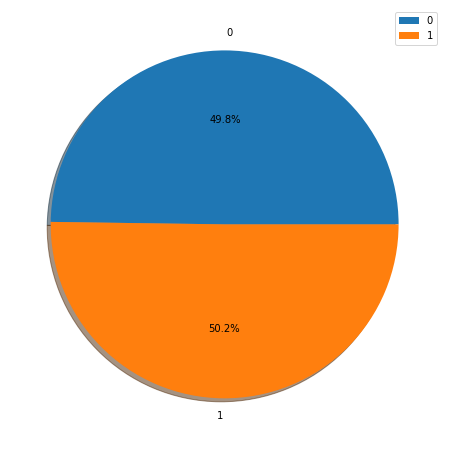

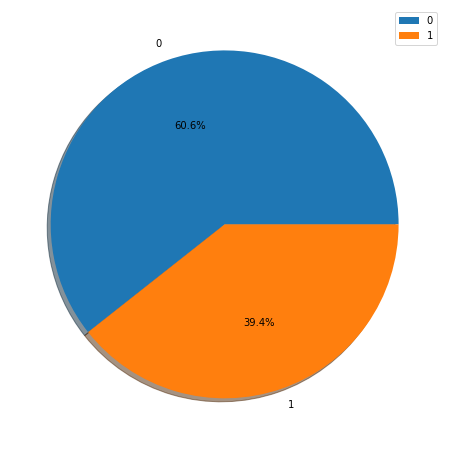

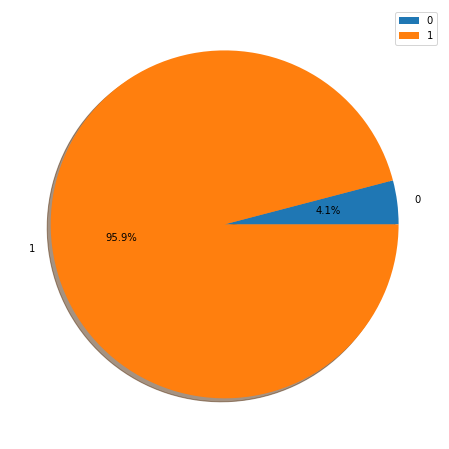

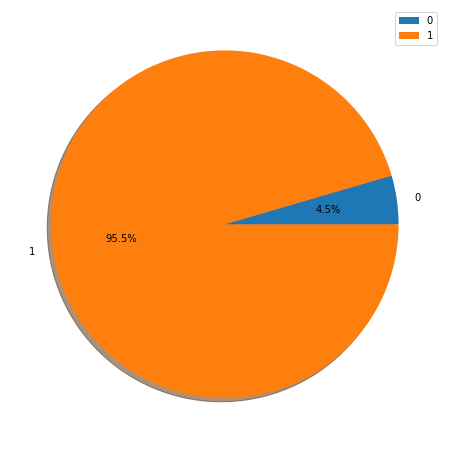

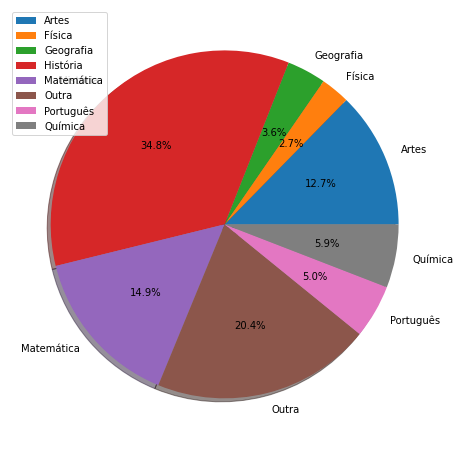

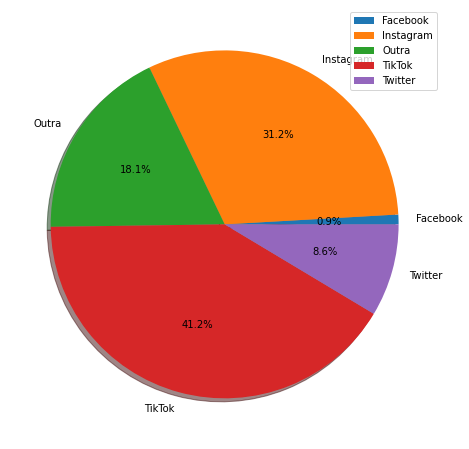

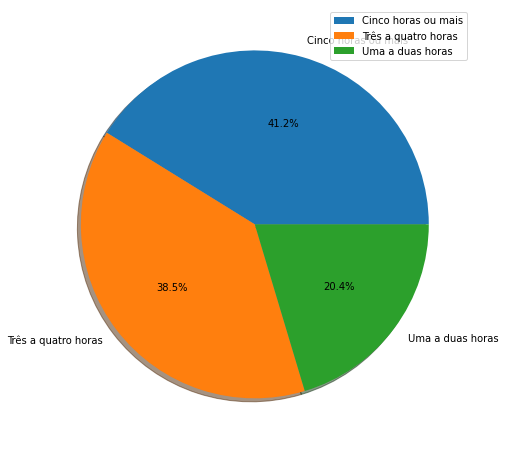

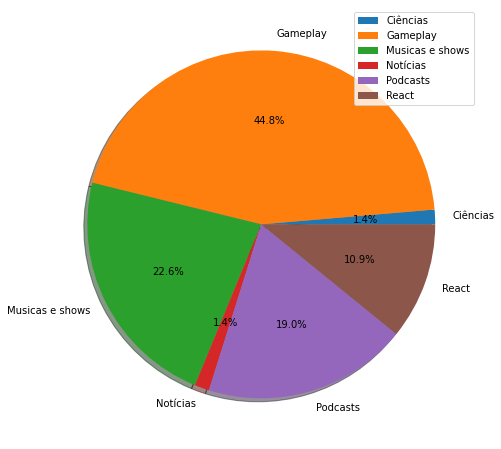

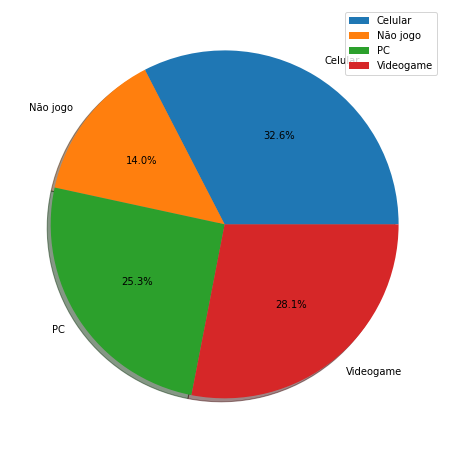

In [8]:

def plotapie(df, colnome, titulo):

        plt.figure(figsize=(8,8))

        pie1 = plt.pie(df.groupby([colnome]).count()['nome'], 
                labels = df.groupby([colnome]).count()['nome'].index,
               autopct='%1.1f%%',
               shadow = True)
        #plt.title(titulo, fontsize=20)
        L=plt.legend()
        #L.get_texts()[0].set_text('Não')
        #L.get_texts()[1].set_text('Feminino')

        plt.savefig(f'graficos/pieplot_{colnome}.png', bbox_inches='tight')
        plt.show()

plotapie(df, 'tipo', 'Tipo de Questionário')
plotapie(df, 'ano', 'Ano')
plotapie(df, 'numirmaos', 'Número de Irmãos')
plotapie(df, 'lelivros', 'Possui hábito de Ler Livros')
plotapie(df, 'lehqs', 'Possui Hábito de Ler HQs')
plotapie(df, 'ouvemusicas', 'Possui Hábito de Ouvir Músicas')
plotapie(df, 'vefilmeserie', 'Vê Filmes e/ou Séries')
plotapie(df, 'materia', 'Matéria Preferida')
plotapie(df, 'redesocial', 'Rede Social Preferida')
plotapie(df, 'horascel', 'Horas Diárias no Celular')
plotapie(df, 'videoyt', 'Conteúdo Preferido no Youtube')
plotapie(df, 'jogos', 'Hábito de Jogar')


## Pontuação por Características

<Figure size 792x1152 with 0 Axes>

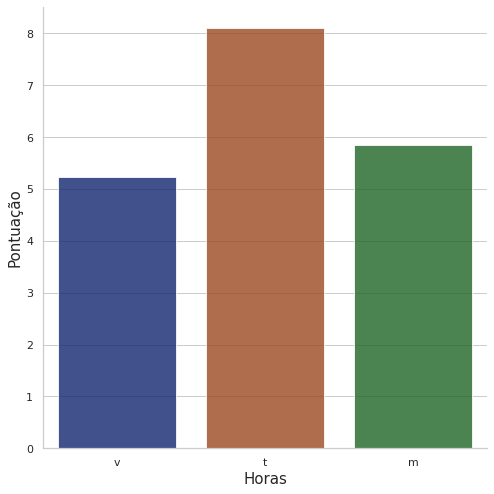

<Figure size 792x1152 with 0 Axes>

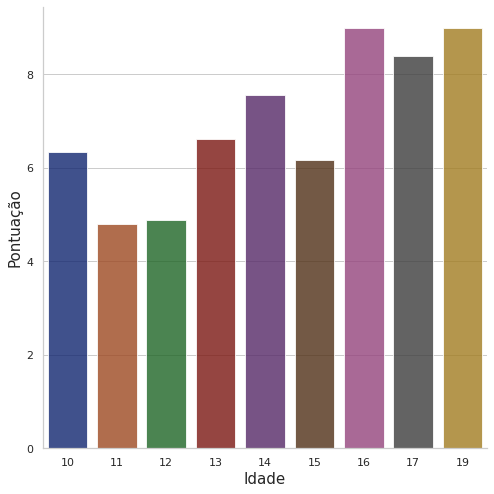

<Figure size 792x1152 with 0 Axes>

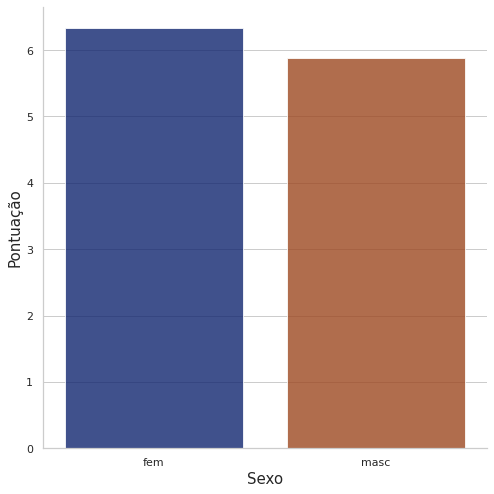

<Figure size 792x1152 with 0 Axes>

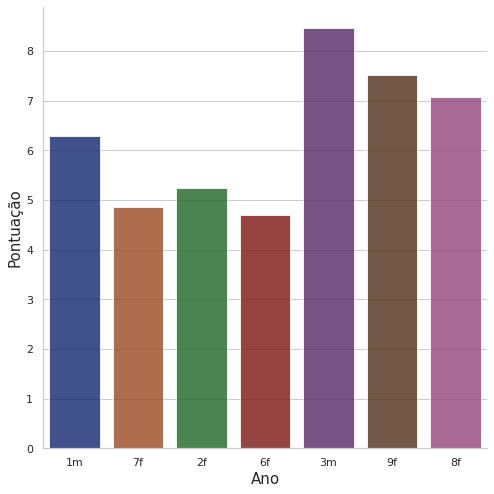

<Figure size 792x1152 with 0 Axes>

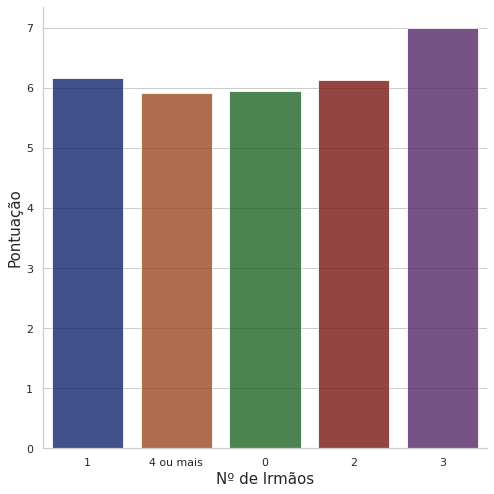

<Figure size 792x1152 with 0 Axes>

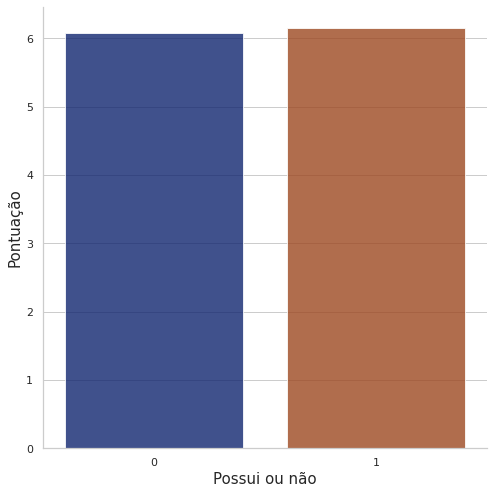

<Figure size 792x1152 with 0 Axes>

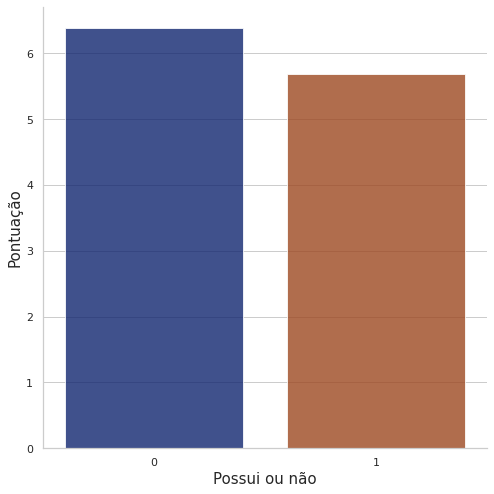

<Figure size 792x1152 with 0 Axes>

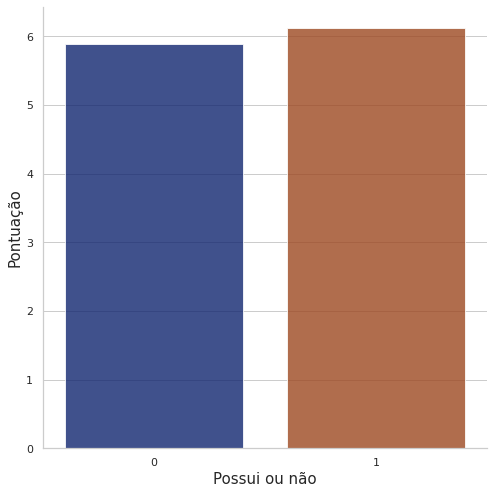

<Figure size 792x1152 with 0 Axes>

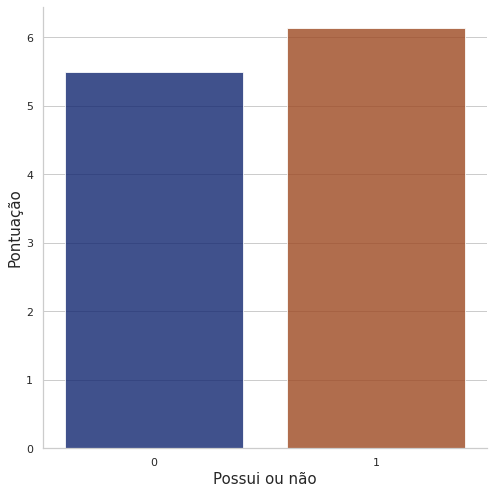

<Figure size 792x1152 with 0 Axes>

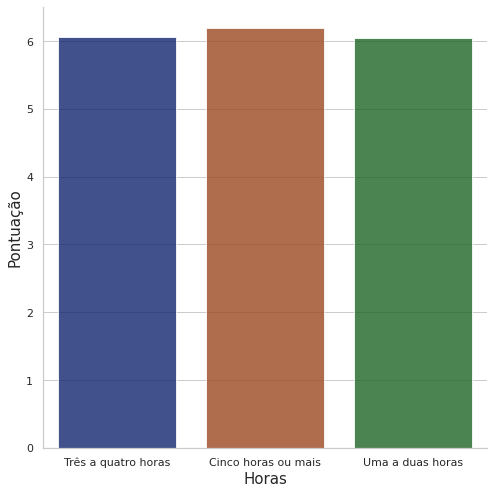

<Figure size 792x1152 with 0 Axes>

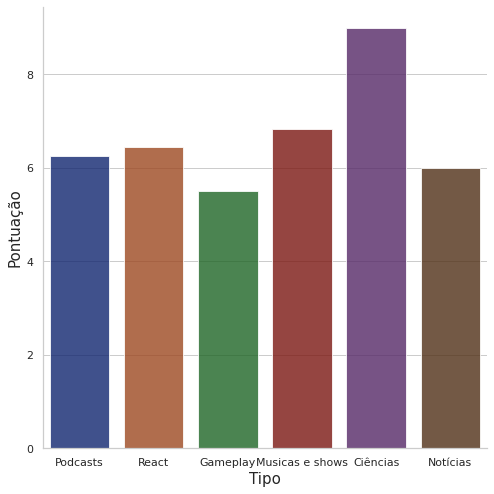

<Figure size 792x1152 with 0 Axes>

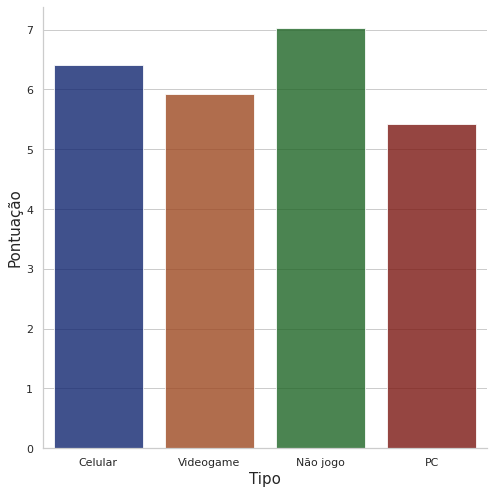

In [11]:
def barpont(df, x, y, titulo, labelx, labely):


    sns.set_theme(style = 'whitegrid')

    plt.figure(figsize=(11,16))

    df['sexo'] = df['sfem'].replace(1,'fem').replace(0,'masc')


    sns.catplot(data = df, kind = 'bar',
                    x = x, y = y,
                   ci=None, palette='dark', alpha = 0.8, height = 7)

    #plt.title(titulo, fontsize = 20)
    plt.xlabel(labelx, fontsize = 15)
    plt.ylabel(labely, fontsize = 15)
    
    plt.savefig(f'graficos/barplot_{x}-{y}.png', bbox_inches='tight')
    
    plt.show()
    
barpont(df, 'tipo', 'pont',  'Média de Pontuação por Tipo de Questionário', 'Horas', 'Pontuação')
barpont(df, 'idade', 'pont',  'Média de Pontuação por Idade', 'Idade', 'Pontuação')
barpont(df, 'sexo', 'pont',  'Média de Pontuação por Sexo', 'Sexo', 'Pontuação')
barpont(df, 'ano', 'pont',  'Média de Pontuação por Ano', 'Ano', 'Pontuação')
barpont(df, 'numirmaos', 'pont',  'Média de Pontuação por Nº de Irmãos', 'Nº de Irmãos', 'Pontuação')
barpont(df, 'lelivros', 'pont',  'Média de Pontuação por Habito de Leitura', 'Possui ou não', 'Pontuação')
barpont(df, 'lehqs', 'pont',  'Média de Pontuação por Hábito de Leitura de HQs', 'Possui ou não', 'Pontuação')
barpont(df, 'ouvemusicas', 'pont',  'Média de Pontuação por Hábito de Ouvir Músicas', 'Possui ou não', 'Pontuação')
barpont(df, 'vefilmeserie', 'pont',  'Média de Pontuação por Hábito de Ver filmes e séries', 'Possui ou não', 'Pontuação')
barpont(df, 'horascel', 'pont',  'Média de Pontuação por Horas Diárias no Cel', 'Horas', 'Pontuação')
barpont(df, 'videoyt', 'pont',  'Média de Pontuação por Tipo de Conteúdo no Youtube', 'Tipo', 'Pontuação')
barpont(df, 'jogos', 'pont',  'Média de Pontuação por preferência por Jogos', 'Tipo', 'Pontuação')
